# Linear Regression

Add cells for your answers as needed after each question.

1. Create a sample dataset $\{ (x^{(i)},y^{(i)}) \}$  of 1000 examples where 
    * $x$ and $y$ are approximately linearly dependent. You may pick the parameters $w,b$ as you like.
    * $y - (w x+b)$ is normal distributed. 
    
Plot $x$ vs $y$ and histogram $y - (w x+b)$.
   

In [1]:
import numpy as np
import matplotlib.pyplot as plt

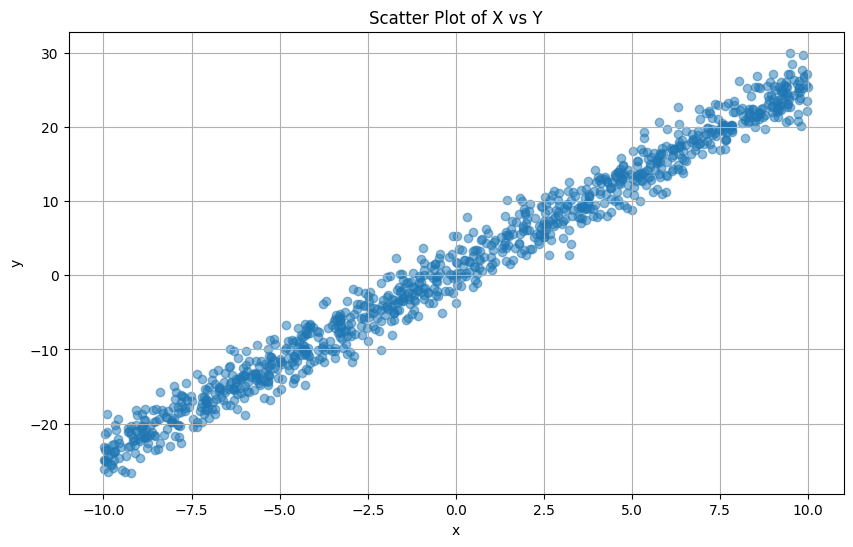

In [2]:
# Parameters for equation
w = 2.5
b = 1.0

# Generating 1k random x values
x = np.random.uniform(-10,10,1000)

# Generating y values that are normally distributed
noise = np.random.normal(0,2,1000)
y = w*x + b + noise


# Plotting X vs Y
plt.figure(figsize=(10,6))
plt.scatter(x,y,alpha=0.5)
plt.title('Scatter Plot of X vs Y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

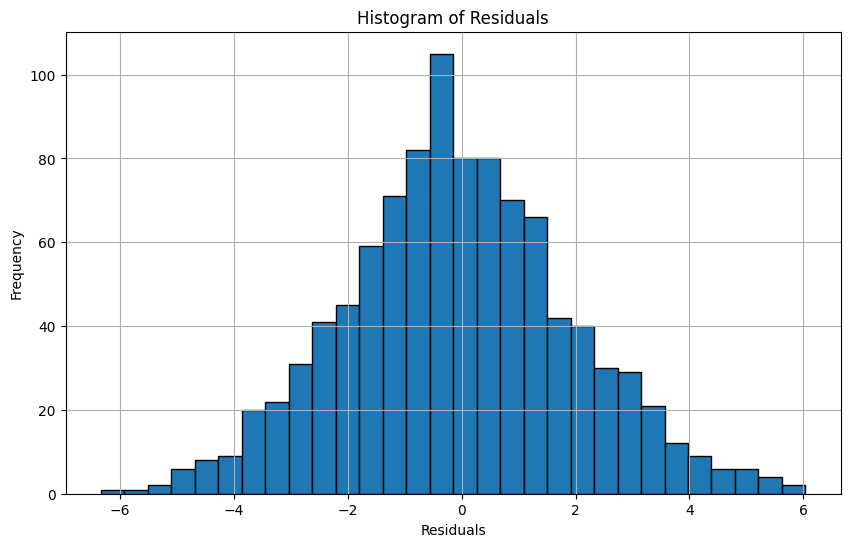

In [3]:
residuals = y - (w*x + b)

plt.figure(figsize=(10,6))
plt.hist(residuals, bins = 30, edgecolor = 'black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

2. Create functions `model_loop(x,w,b)` and `model_np(x,w,b)` that compute $y=wx+b$, the first using explicit loops, the second computing using numpy and no loops. Illustrate that the two functions create identical output. Use numpy version for the remainder of the lab.

In [5]:
# Function using explicit loops
def model_loop(x, w, b):
    y = []
    for i in range(len(x)):
        y.append(w * x[i] + b)
    return np.array(y)

# Function using NumPy (no loops)
def model_np(x, w, b):
    return w * x + b

# Generate 1000 random x values
x = np.random.uniform(-10, 10, 1000)

# Parameters
w = 2.5
b = 1.0

# Compute y using both functions
y_loop = model_loop(x, w, b)
y_np = model_np(x, w, b)

# Check if both outputs are identical
same = np.allclose(y_loop, y_np)

# Print results
print("Are the outputs same?:", same)

Are the outputs same?: True


3. Plot $x$ vs $y$ and compare to $x$ vs. $wx+b$ for the parameters from exercise 1.

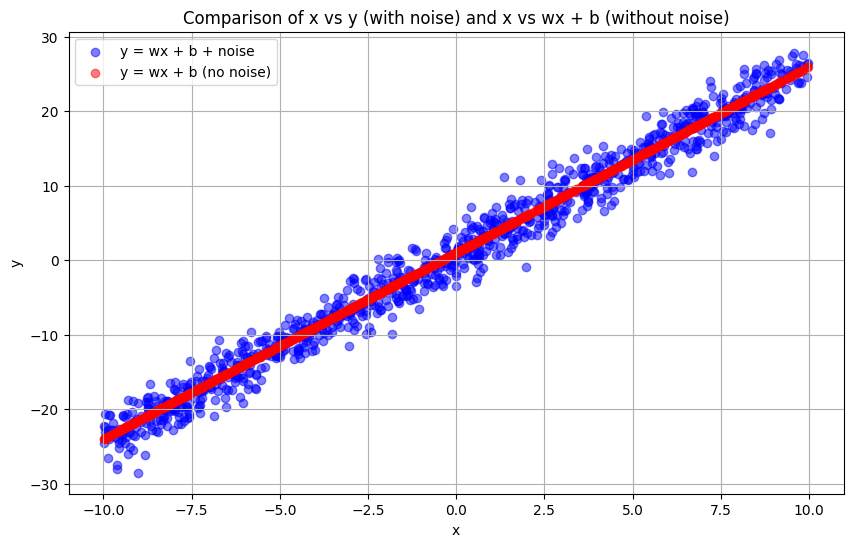

In [6]:
# Parameters for the linear equation
w = 2.5
b = 1.0

# Generate 1000 random x values
x = np.random.uniform(-10, 10, 1000)

# Generate y values with normally distributed noise
noise = np.random.normal(0, 2, 1000)  # mean = 0, std deviation = 2
y = model_np(x, w, b) + noise

# Compute wx + b without noise
y_model = model_np(x, w, b)

# Plot x vs y (with noise)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='y = wx + b + noise', color='blue')

# Plot x vs wx + b (without noise)
plt.scatter(x, y_model, alpha=0.5, label='y = wx + b (no noise)', color='red')

# Add labels and legend
plt.title("Comparison of x vs y (with noise) and x vs wx + b (without noise)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

4. Create a function `cost(x,y,w,b)` that computes the mean square error between model prediction and data. Use numpy expressions and do not do any explicit loops in python. Make 2 plots illusrating the parabolic shape of the cost function:
   * Plot the cost vs $w$ for the dataset, holding $b$ constant. 
   * Plot the cost vs $b$ for the dataset, holding $w$ constant. 


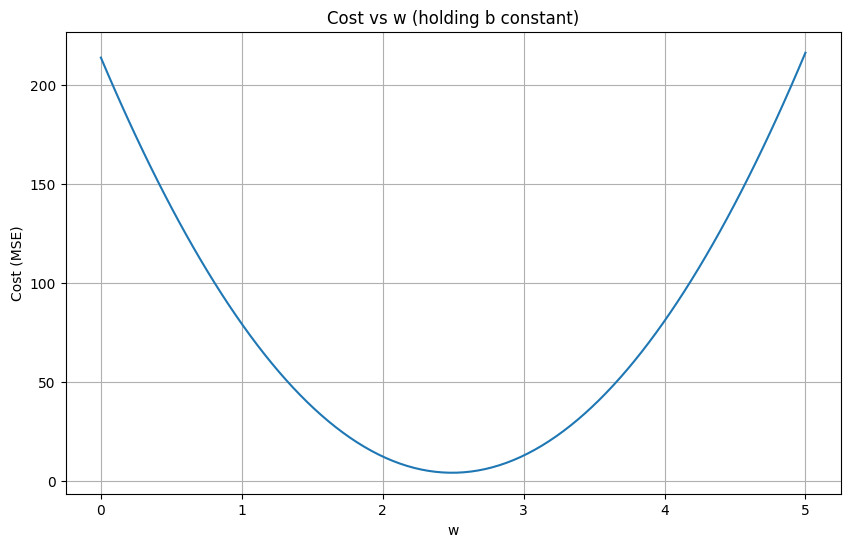

In [7]:
#Compute the mean squared error between the model prediction and actual data
def cost(x, y, w, b):
    y_pred = w * x + b
    return np.mean((y_pred - y) ** 2)

# Parameters for the linear equation
w_true = 2.5
b_true = 1.0

# Generate 1000 random x values
x = np.random.uniform(-10, 10, 1000)

# Generate y values with normally distributed noise
noise = np.random.normal(0, 2, 1000)
y = model_np(x, w_true, b_true) + noise

# Plot cost vs w (holding b constant)
w_values = np.linspace(0, 5, 100)  # Varying w from 0 to 5
cost_values_w = [cost(x, y, w, b_true) for w in w_values]

plt.figure(figsize=(10, 6))
plt.plot(w_values, cost_values_w, label='Cost vs w')
plt.title("Cost vs w (holding b constant)")
plt.xlabel("w")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()

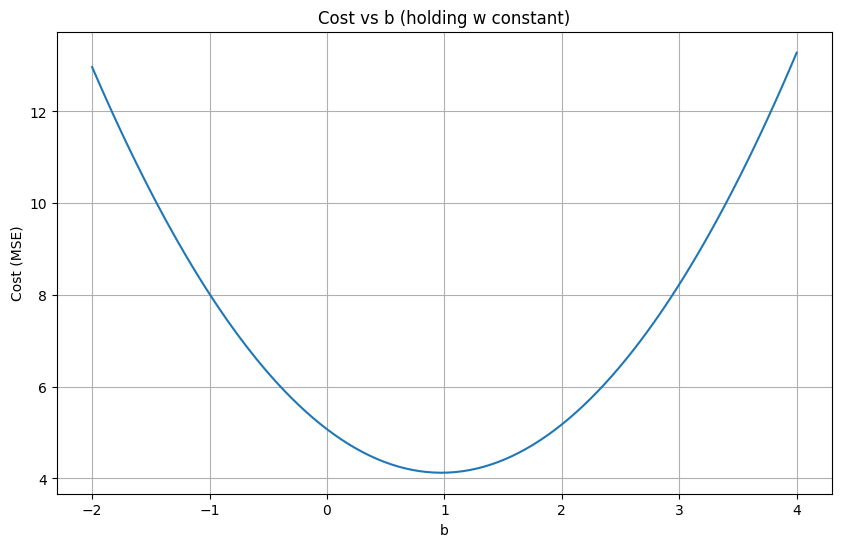

In [8]:
b_values = np.linspace(-2, 4, 100)  # Varying b from -2 to 4
cost_values_b = [cost(x, y, w_true, b) for b in b_values]

plt.figure(figsize=(10, 6))
plt.plot(b_values, cost_values_b, label='Cost vs b')
plt.title("Cost vs b (holding w constant)")
plt.xlabel("b")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()

5. Create a function `dj_dw, dj_db = gradient(x, y, w, b)` that computes the gradient wrt $w$ and $b$ on a dataset. Use numpy expressions and do not do any explicit loops in python. Make 2 plots that illustrates that the gradient is 0 at the optimal values of $w$ and $b$ by:
   * Ploting the gradient vs $w$ for the dataset, holding $b$ constant. 
   * Ploting the gradient vs $b$ for the dataset, holding $w$ constant. 

In [9]:
import copy
import math

# Gradient function to calculate the derivatives of the cost function
def gradient(x, y, w, b):
    m = x.shape[0]  # number of examples

    y_pred = w * x + b
    error = y_pred - y

    dj_dw = (2/m) * np.dot(error, x)
    dj_db = (2/m) * np.sum(error)

    return dj_dw, dj_db

6. Use the following `gradient_descent` function to "fit" a line to the data.  Make sure you do not start at the optimal values from exercise 1. You may have to try different values of `alpha`. 

In [10]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    
    J_history = []
    p_history = []

    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:    
            J_history.append( cost(x, y, w , b))
            p_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history 

Iteration    0: Cost 2.72e+01  dj_dw: -1.685e+02, dj_db: -2.658e+00   w:  1.685e+00, b: 2.65768e-02
Iteration 1000: Cost 4.12e+00  dj_dw:  1.423e-11, dj_db: -3.284e-09   w:  2.493e+00, b: 9.75019e-01
Iteration 2000: Cost 4.12e+00  dj_dw:  1.507e-14, dj_db: -5.230e-15   w:  2.493e+00, b: 9.75019e-01
Iteration 3000: Cost 4.12e+00  dj_dw:  1.507e-14, dj_db: -5.230e-15   w:  2.493e+00, b: 9.75019e-01
Iteration 4000: Cost 4.12e+00  dj_dw:  1.507e-14, dj_db: -5.230e-15   w:  2.493e+00, b: 9.75019e-01
Iteration 5000: Cost 4.12e+00  dj_dw:  1.507e-14, dj_db: -5.230e-15   w:  2.493e+00, b: 9.75019e-01
Iteration 6000: Cost 4.12e+00  dj_dw:  1.507e-14, dj_db: -5.230e-15   w:  2.493e+00, b: 9.75019e-01
Iteration 7000: Cost 4.12e+00  dj_dw:  1.507e-14, dj_db: -5.230e-15   w:  2.493e+00, b: 9.75019e-01
Iteration 8000: Cost 4.12e+00  dj_dw:  1.507e-14, dj_db: -5.230e-15   w:  2.493e+00, b: 9.75019e-01
Iteration 9000: Cost 4.12e+00  dj_dw:  1.507e-14, dj_db: -5.230e-15   w:  2.493e+00, b: 9.75019e-01


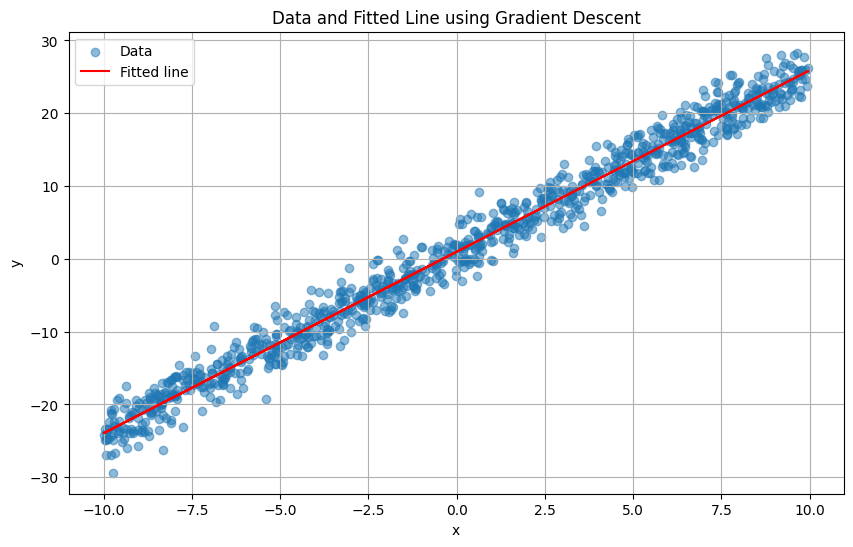

In [11]:
y = model_np(x, w_true, b_true) + noise

# Initial parameters (start far from optimal)
w_init = 0.0
b_init = 0.0

# Learning rate
alpha = 0.01

# Number of iterations
num_iters = 10000

# Run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x, y, w_init, b_init, alpha, num_iters, cost, gradient)

# Final parameters
print(f"Final parameters after gradient descent: w = {w_final}, b = {b_final}")

# Plot the data and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x, model_np(x, w_final, b_final), color='red', label='Fitted line')
plt.title("Data and Fitted Line using Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

7. Plot the cost and parameters versus iteration of gradient descent.

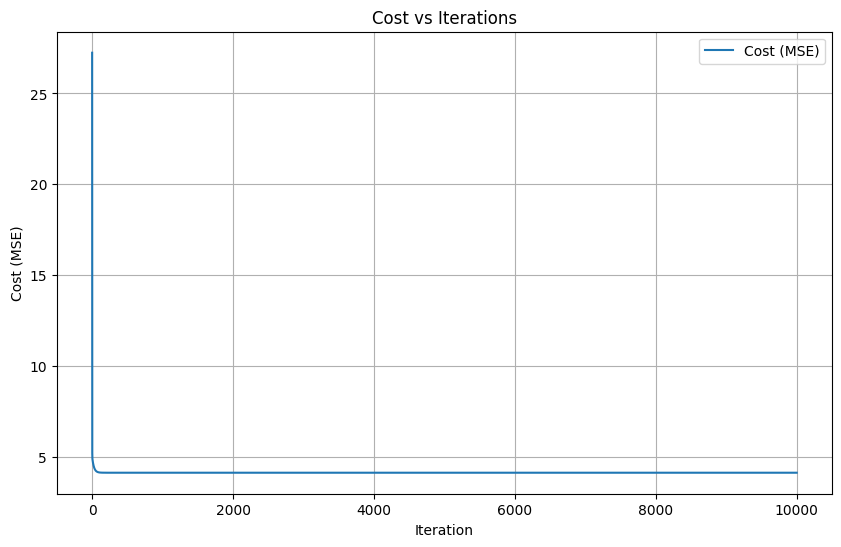

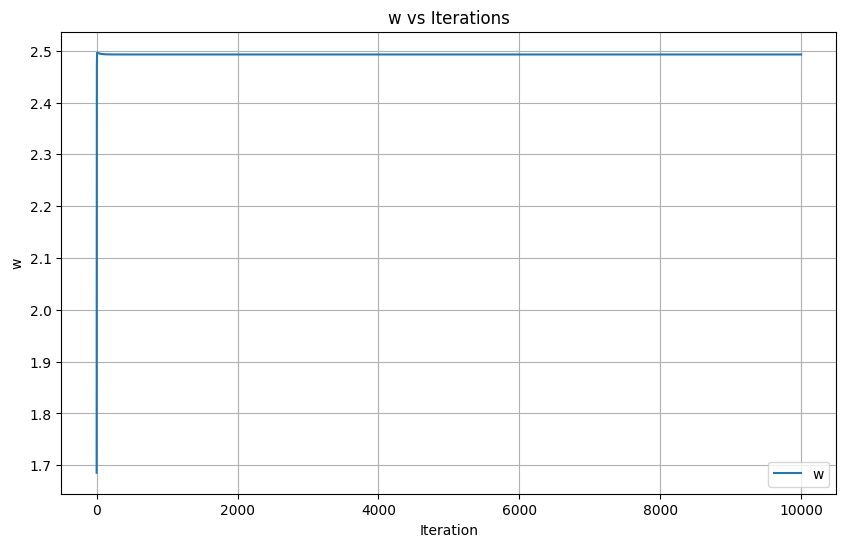

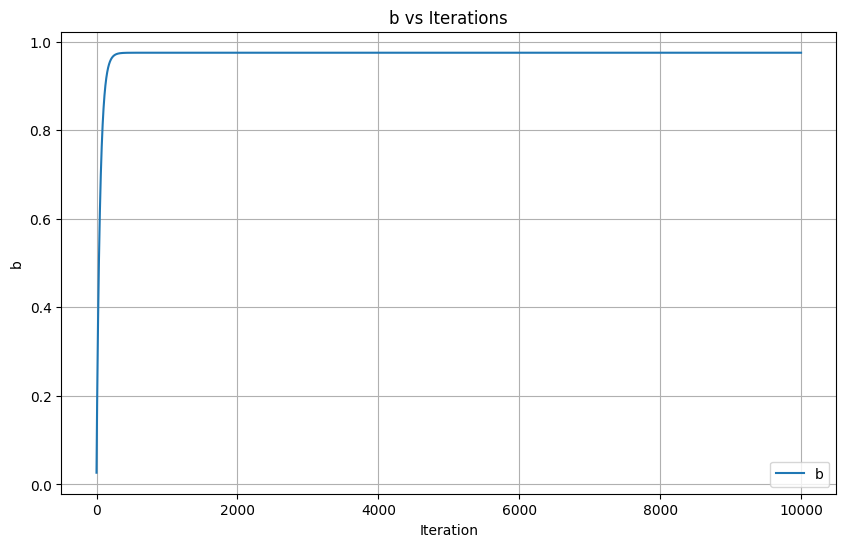

In [12]:
# Convert p_history to numpy array for easier slicing
p_history = np.array(p_hist)

# Plot cost vs iterations
plt.figure(figsize=(10, 6))
plt.plot(J_hist, label='Cost (MSE)')
plt.title("Cost vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.legend()
plt.show()

# Plot w vs iterations
plt.figure(figsize=(10, 6))
plt.plot(p_history[:, 0], label='w')
plt.title("w vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("w")
plt.grid(True)
plt.legend()
plt.show()

# Plot b vs iterations
plt.figure(figsize=(10, 6))
plt.plot(p_history[:, 1], label='b')
plt.title("b vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("b")
plt.grid(True)
plt.legend()
plt.show()